In [17]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 231837540849417814, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10631133290578174678
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3283423770424193611
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9260682445
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18100930849935852787
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1"]

In [19]:
image_folder_path = '/media/disk2/vefimova/kaist/images/'
gt_path = '/media/disk2/vefimova/kaist/gt/'
bmp_path = '/media/disk2/vefimova/kaist/segmentation/'
processed_image_folder_path = '/media/disk2/vefimova/kaist/processed/'
processed_image_folder_path_test = '/media/disk2/vefimova/kaist/processed_test/'

In [20]:
#os.mkdir(processed_image_folder_path)

In [21]:
import unicodedata
files = [unicodedata.normalize('NFC', f) for f in os.listdir(image_folder_path)]
lf = len(files)
train_len = int(lf * 0.9)
train_files = files[:train_len]
test_files = files[train_len:]
print(files)

['DSC02395.JPG', 'DSC03218.JPG', 'DSC03901.JPG', 'DSC04120.JPG', '080116-0060.jpg', 'DSC02858.JPG', 'x.jpg', '113.jpg', '080119-0016.jpg', '055.JPG', 'DSC02676.JPG', '138.JPG', 'DSC02949.JPG', '080119-0004.jpg', '2007-12-08-day-099.jpg', '7.jpg', 'DSC03084.JPG', 'DSC02450.JPG', 'DSC03142.JPG', '050.JPG', '080116-0089.jpg', 'DSC03441.JPG', 'DSC03402.JPG', '080119-0014.jpg', 'DSC03112.JPG', 'DSC03093.JPG', 'DSC02859.JPG', '041.JPG', 'DSC02442.JPG', 'DSC03083.JPG', 'DSC03942.JPG', 'DSC04066.JPG', 'P1010028.JPG', 'DSC02501.JPG', 'DSC02725.JPG', 'DSC03376.JPG', 'DSC02427.JPG', 'DSC02480.JPG', 'DSC03936.JPG', 'DSC03225.JPG', 'DSC03201.JPG', 'DSC03761.JPG', 'v.jpg', '033.jpg', 'P1010044.JPG', '137.JPG', '2007-12-09-day-exterior-047.jpg', 'DSC03467.JPG', 'DSC02629.JPG', 'DSC03279.JPG', 'DSC03366.JPG', 'DSC03082.JPG', 'DSC02641.JPG', 'DSC02613.JPG', 'DSC03076.JPG', 'DSC03151.JPG', 'DSC04361.JPG', 'DSC03297.JPG', 't.jpg', 'DSC03007.JPG', 'DSC04131.JPG', '8_m_starfirm.jpg', 'DSC02587.JPG', 'DSC02

In [22]:
import matplotlib.pyplot as plt
import cv2
from scipy.misc import imresize, imsave

/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


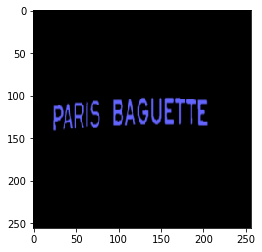

In [23]:
ttt = cv2.imread(bmp_path + "6.bmp")
ttt = imresize(ttt, (256, 256))
plt.figure()
plt.imshow(ttt)

In [24]:
from PIL import Image
import numpy as np

In [25]:
skip = ["080116-0060.jpg"]

In [26]:
def process_dataset(file_list, img_path):
    for (i, path) in enumerate(file_list):
        print(path)
    #     if (path in skip):
    #         continue
        # read real
        image = Image.open(image_folder_path + path)
        image = imresize(image, (256, 256))
        # read mask 
        mask = cv2.imread(bmp_path + path[:-4] + ".bmp")
        mask = imresize(mask, (256, 256))
        # add
        imgs_comb = np.hstack(np.asarray([image, mask]))
        new_image = Image.fromarray(imgs_comb)  
        new_image.save(img_path + path)

        #imsave(image_folder_path_small + path, new_image)
        print(img_path + path + "    " + str(i))

In [27]:
process_dataset(train_files, processed_image_folder_path)

DSC02395.JPG
/media/disk2/vefimova/kaist/processed/DSC02395.JPG    0
DSC03218.JPG
/media/disk2/vefimova/kaist/processed/DSC03218.JPG    1
DSC03901.JPG
/media/disk2/vefimova/kaist/processed/DSC03901.JPG    2
DSC04120.JPG
/media/disk2/vefimova/kaist/processed/DSC04120.JPG    3
080116-0060.jpg


/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


/media/disk2/vefimova/kaist/processed/080116-0060.jpg    4
DSC02858.JPG
/media/disk2/vefimova/kaist/processed/DSC02858.JPG    5
x.jpg
/media/disk2/vefimova/kaist/processed/x.jpg    6
113.jpg
/media/disk2/vefimova/kaist/processed/113.jpg    7
080119-0016.jpg
/media/disk2/vefimova/kaist/processed/080119-0016.jpg    8
055.JPG
/media/disk2/vefimova/kaist/processed/055.JPG    9
DSC02676.JPG
/media/disk2/vefimova/kaist/processed/DSC02676.JPG    10
138.JPG
/media/disk2/vefimova/kaist/processed/138.JPG    11
DSC02949.JPG
/media/disk2/vefimova/kaist/processed/DSC02949.JPG    12
080119-0004.jpg
/media/disk2/vefimova/kaist/processed/080119-0004.jpg    13
2007-12-08-day-099.jpg
/media/disk2/vefimova/kaist/processed/2007-12-08-day-099.jpg    14
7.jpg
/media/disk2/vefimova/kaist/processed/7.jpg    15
DSC03084.JPG
/media/disk2/vefimova/kaist/processed/DSC03084.JPG    16
DSC02450.JPG
/media/disk2/vefimova/kaist/processed/DSC02450.JPG    17
DSC03142.JPG
/media/disk2/vefimova/kaist/processed/DSC03142.JP

/media/disk2/vefimova/kaist/processed/DSC03941.JPG    123
f.jpg
/media/disk2/vefimova/kaist/processed/f.jpg    124
077.JPG
/media/disk2/vefimova/kaist/processed/077.JPG    125
DSC03946.JPG
/media/disk2/vefimova/kaist/processed/DSC03946.JPG    126
P1010064.JPG
/media/disk2/vefimova/kaist/processed/P1010064.JPG    127
m.jpg
/media/disk2/vefimova/kaist/processed/m.jpg    128
DSC02524.JPG
/media/disk2/vefimova/kaist/processed/DSC02524.JPG    129
DSC02914.JPG
/media/disk2/vefimova/kaist/processed/DSC02914.JPG    130
DSC04432.JPG
/media/disk2/vefimova/kaist/processed/DSC04432.JPG    131
IMG_2618.JPG
/media/disk2/vefimova/kaist/processed/IMG_2618.JPG    132
080116-0065.jpg
/media/disk2/vefimova/kaist/processed/080116-0065.jpg    133
080118-0011.jpg
/media/disk2/vefimova/kaist/processed/080118-0011.jpg    134
DSC04251.JPG
/media/disk2/vefimova/kaist/processed/DSC04251.JPG    135
DSC02317.JPG
/media/disk2/vefimova/kaist/processed/DSC02317.JPG    136
DSC02788.JPG
/media/disk2/vefimova/kaist/proc

/media/disk2/vefimova/kaist/processed/DSC02850.JPG    242
DSC02618.JPG
/media/disk2/vefimova/kaist/processed/DSC02618.JPG    243
tjtjdska2008.jpg
/media/disk2/vefimova/kaist/processed/tjtjdska2008.jpg    244
036.jpg
/media/disk2/vefimova/kaist/processed/036.jpg    245
DSC02358.JPG
/media/disk2/vefimova/kaist/processed/DSC02358.JPG    246
DSC02352.JPG
/media/disk2/vefimova/kaist/processed/DSC02352.JPG    247
080119-0035.jpg
/media/disk2/vefimova/kaist/processed/080119-0035.jpg    248
DSC03026.JPG
/media/disk2/vefimova/kaist/processed/DSC03026.JPG    249
DSC02868.JPG
/media/disk2/vefimova/kaist/processed/DSC02868.JPG    250
P1010076.JPG
/media/disk2/vefimova/kaist/processed/P1010076.JPG    251
DSC02570.JPG
/media/disk2/vefimova/kaist/processed/DSC02570.JPG    252
DSC03887.JPG
/media/disk2/vefimova/kaist/processed/DSC03887.JPG    253
DSC04410.JPG
/media/disk2/vefimova/kaist/processed/DSC04410.JPG    254
DSC03935.JPG
/media/disk2/vefimova/kaist/processed/DSC03935.JPG    255
DSC03831.JPG
/m

In [14]:
process_dataset(test_files, processed_image_folder_path_test)

DSC04023.JPG
/media/disk2/vefimova/kaist/processed_test/DSC04023.JPG    0
DSC03023.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03023.JPG    1
DSC03575.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03575.JPG    2
100.JPG
/media/disk2/vefimova/kaist/processed_test/100.JPG    3
DSC02984.JPG


/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


/media/disk2/vefimova/kaist/processed_test/DSC02984.JPG    4
DSC02980.JPG
/media/disk2/vefimova/kaist/processed_test/DSC02980.JPG    5
2007-12-08-day-111.jpg
/media/disk2/vefimova/kaist/processed_test/2007-12-08-day-111.jpg    6
DSC03192.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03192.JPG    7
6_fabdent.jpg
/media/disk2/vefimova/kaist/processed_test/6_fabdent.jpg    8
DSC03401.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03401.JPG    9
DSC03765.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03765.JPG    10
080119-0020.jpg
/media/disk2/vefimova/kaist/processed_test/080119-0020.jpg    11
DSC03413.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03413.JPG    12
DSC03395.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03395.JPG    13
DSC04430.JPG
/media/disk2/vefimova/kaist/processed_test/DSC04430.JPG    14
DSC04163.JPG
/media/disk2/vefimova/kaist/processed_test/DSC04163.JPG    15
DSC03038.JPG
/media/disk2/vefimova/kaist/processed_test/DSC03038.JPG    16
107.jpg
/media/d

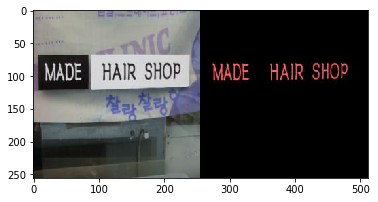

In [15]:
zzz = cv2.imread("/media/disk2/vefimova/kaist/processed/DSC04120.JPG")
plt.figure()
plt.imshow(zzz)

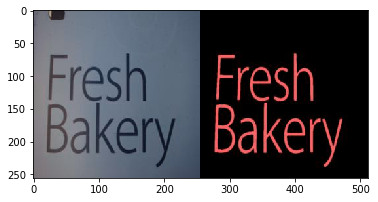

In [16]:
zzz = cv2.imread("/media/disk2/vefimova/kaist/processed_test/DSC04458.JPG")
plt.figure()
plt.imshow(zzz)